<a href="https://colab.research.google.com/github/lauramoraes/Analise_de_Clusters/blob/master/4%20-%20SVD%20com%20imagens%20(Python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Salvando as imagens

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

upload_files()
# https://people.sc.fsu.edu/~jburkardt/data/jpg/lena.jpg

Saving lena.jpg to lena.jpg


['lena.jpg']

#SVD

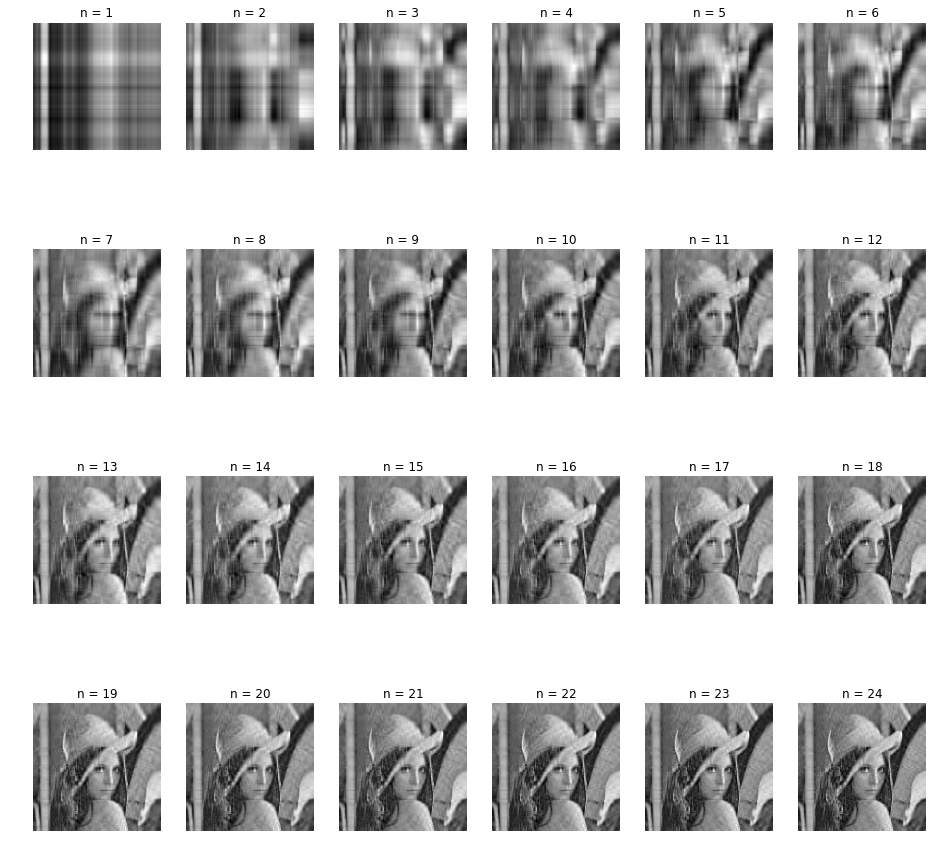

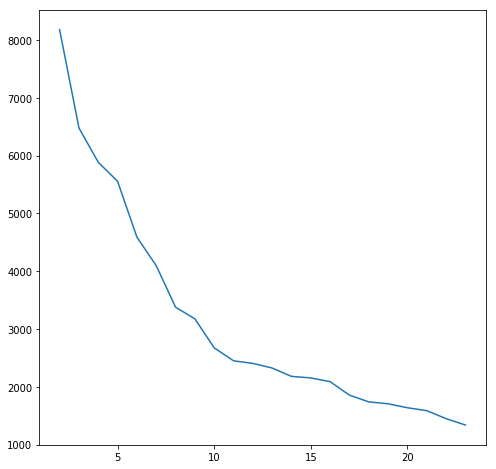

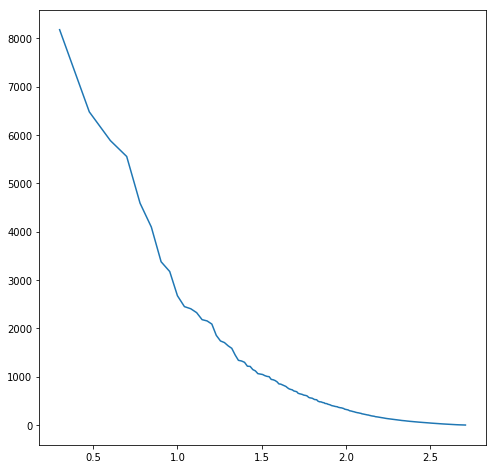

In [12]:
local = "lena.jpg"
img = Image.open(local)
imggray = img
# imggray = img.convert('LA')


plt.figure(figsize=(16,16))
fig = plt.subplot(6, 4, 1)
plt.imshow(imggray)
title = "original"
plt.axis('off')
plt.title(title)
plt.savefig(local+title+".jpg")
#plt.show()

imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

#plt.figure(figsize=(16,16))
#plt.imshow(imgmat, cmap='gray')
#plt.show()

U, sigma, V = np.linalg.svd(imgmat)

reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
#plt.figure(figsize=(16,16))
#plt.imshow(reconstimg, cmap='gray')
#plt.title("n = 1")
#plt.show()
passo=1
sigmas = np.diag(sigma)
#b=np.log(len(sigmas))/np.log(24)
b=np.power(len(sigmas),1/24)

for i in range(1, 25,1):
    k= i
    reconstimg = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
    fig = plt.subplot(4, 6, i)
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" %k
    plt.axis('off')
    plt.title(title)
    #plt.savefig(local+title+".jpg")

plt.show()
plt.figure(figsize=(8,8))
N = 24
# plt.plot(range(len(sigma)),sigma)
plt.plot(range(2,N),sigma[2:N])
plt.figure(figsize=(8,8))
plt.plot(np.log10(range(2,len(sigmas))),sigma[2:])

In [13]:
10**1.5

31.622776601683793